In [34]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
# Define data folder path
train_folder = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_IC/images/train"

# Define list of class labels
class_labels = ["Class_1_Touch", "Class_2_No_hands", "Class_3_No_Touch_w_Hands"]

# Define empty lists for images and labels
x_train = []
y_train = []

# Load and preprocess images in train set
for label in class_labels:
    folder_path = os.path.join(train_folder, label)
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img_arr = preprocess_image(img_path)
        x_train.append(img_arr)
        y_train.append(label)

# Convert labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse_output=False, categories="auto")
y_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

# Convert data to ndarray and tensor shapes
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = y_train.astype("float32")

# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shape of data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (9972, 28, 28, 1)
y_train shape: (9972, 3)
x_test shape: (2494, 28, 28, 1)
y_test shape: (2494, 3)


In [32]:
model = keras.Sequential([
    # convolutional layer with 32 filters, a kernel size of 3, and ReLU activation
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # max pooling layer with a pool size of 2
    keras.layers.MaxPooling2D((2,2)),
    # convolutional layer with 64 filters, a kernel size of 3, and ReLU activation
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # max pooling layer with a pool size of 2
    keras.layers.MaxPooling2D((2,2)),
    # convolutional layer with 64 filters, a kernel size of 3, and ReLU activation
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # flatten layer to convert the output to a 1D array
    keras.layers.Flatten(),
    # dense layer with 64 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),
    # output layer with 3 units and softmax activation for multiclass classification
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

# compile the model with categorical crossentropy loss and Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model to the training data with 10 epochs and a batch size of 32
model.fit(x_train, y_train, epochs=10, batch_size=32)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

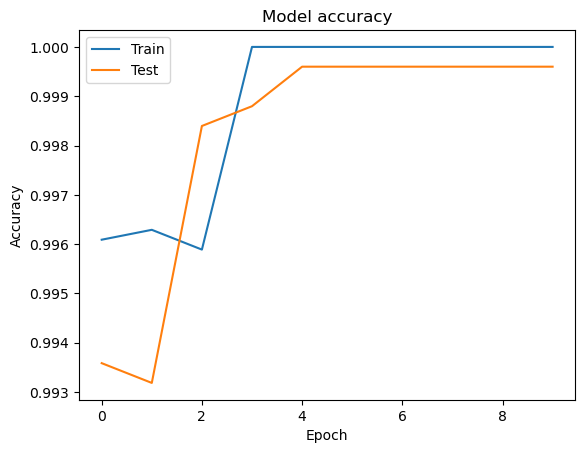

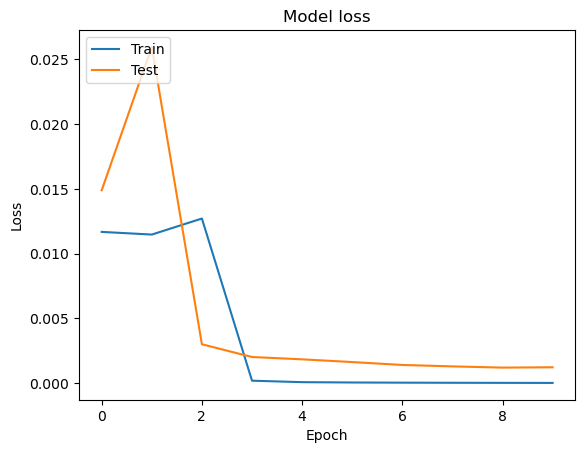

78/78 - 0s - loss: 0.0029 - accuracy: 0.9992 - 217ms/epoch - 3ms/step
Test accuracy: 0.9991980791091919
78/78 [==============================] - 0s 2ms/step


In [33]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Generate predictions for the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)



[[868   1   0]
 [  0 822   0]
 [  1   0 802]]


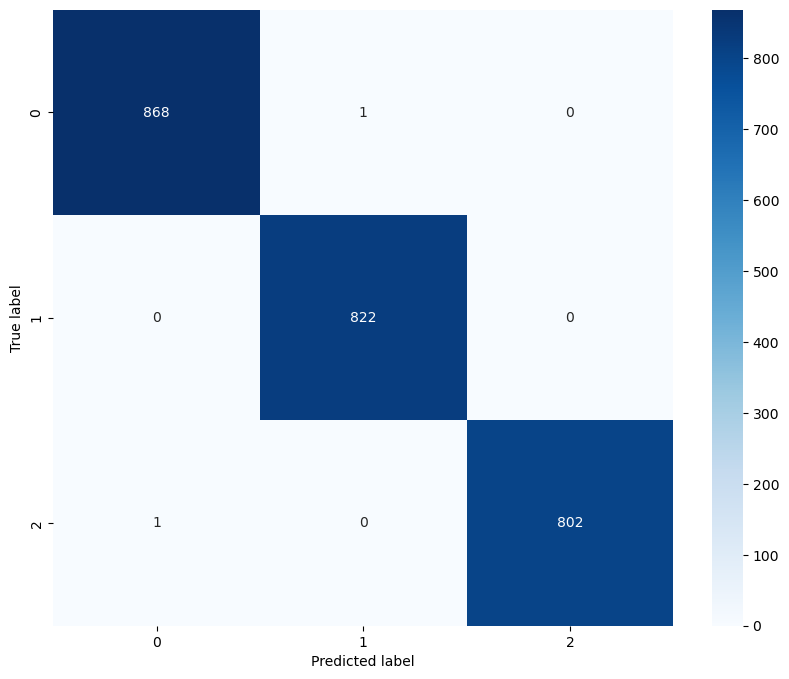

In [35]:
# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test_labels, y_pred_labels)
print(confusion_mtx)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [36]:
# fit the model to the training data with 10 epochs and a batch size of 32
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
312/312 [==============================] - 2s 7ms/step - loss: 1.7406e-04 - accuracy: 1.0000
Epoch 2/50
312/312 [==============================] - 2s 7ms/step - loss: 1.3813e-04 - accuracy: 1.0000
Epoch 3/50
312/312 [==============================] - 2s 7ms/step - loss: 1.1090e-04 - accuracy: 1.0000
Epoch 4/50
312/312 [==============================] - 2s 7ms/step - loss: 0.0639 - accuracy: 0.9801
Epoch 5/50
312/312 [==============================] - 2s 7ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 6/50
312/312 [==============================] - 2s 7ms/step - loss: 0.0075 - accuracy: 0.9979
Epoch 7/50
312/312 [==============================] - 2s 7ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 8/50
312/312 [==============================] - 2s 7ms/step - loss: 3.9865e-04 - accuracy: 1.0000
Epoch 9/50
312/312 [==============================] - 2s 7ms/step - loss: 1.1808e-04 - accuracy: 1.0000
Epoch 10/50
312/312 [==============================] - 2s 7ms/step - loss: 7.019

In [37]:
# fit the model to the training data with 10 epochs and a batch size of 32
model.fit(x_train, y_train, epochs=50, batch_size=75)

Epoch 1/50
133/133 [==============================] - 1s 10ms/step - loss: 3.6431e-06 - accuracy: 1.0000
Epoch 2/50
133/133 [==============================] - 1s 11ms/step - loss: 3.3765e-06 - accuracy: 1.0000
Epoch 3/50
133/133 [==============================] - 1s 11ms/step - loss: 3.1417e-06 - accuracy: 1.0000
Epoch 4/50
133/133 [==============================] - 1s 11ms/step - loss: 2.9029e-06 - accuracy: 1.0000
Epoch 5/50
133/133 [==============================] - 1s 10ms/step - loss: 2.7158e-06 - accuracy: 1.0000
Epoch 6/50
133/133 [==============================] - 1s 10ms/step - loss: 2.5085e-06 - accuracy: 1.0000
Epoch 7/50
133/133 [==============================] - 1s 11ms/step - loss: 2.3159e-06 - accuracy: 1.0000
Epoch 8/50
133/133 [==============================] - 1s 11ms/step - loss: 2.1897e-06 - accuracy: 1.0000
Epoch 9/50
133/133 [==============================] - 2s 11ms/step - loss: 2.0155e-06 - accuracy: 1.0000
Epoch 10/50
133/133 [==============================] - 